In [15]:
pip install diffusers transformers torch scipy safetensors accelerate

Note: you may need to restart the kernel to use updated packages.


In [16]:
from diffusers import StableDiffusionPipeline
import torch

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [18]:
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe.to(device)

# Basic prompt
prompt = "A fantasy landscape, artstation style"
image = pipe(prompt).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

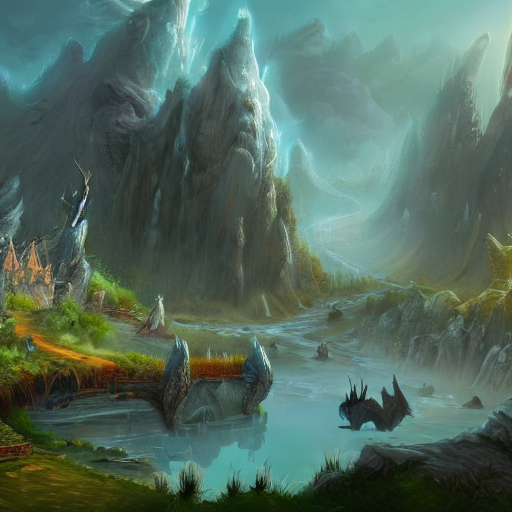

In [19]:
image

In [20]:
# Enhanced prompt and parameters
enhanced_prompt = (
    "A majestic fantasy valley at sunrise, golden light piercing through misty clouds, ancient ruins covered in moss, glowing blue waterfalls cascading into crystal-clear lakes, surrounded by massive bioluminescent trees, cinematic lighting, hyper-detailed, artstation concept art, 8k resolution"
)

# Optional: negative prompt to avoid unwanted content
negative_prompt = negative_prompt = "blurry, low resolution, low detail, poorly rendered, cartoonish, distorted, cropped, watermark"

enhanced_image = pipe(
    prompt=enhanced_prompt,
    negative_prompt=negative_prompt,
    guidance_scale=8.5,            # CFG (prompt strength)
    num_inference_steps=50         # More steps = higher quality
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

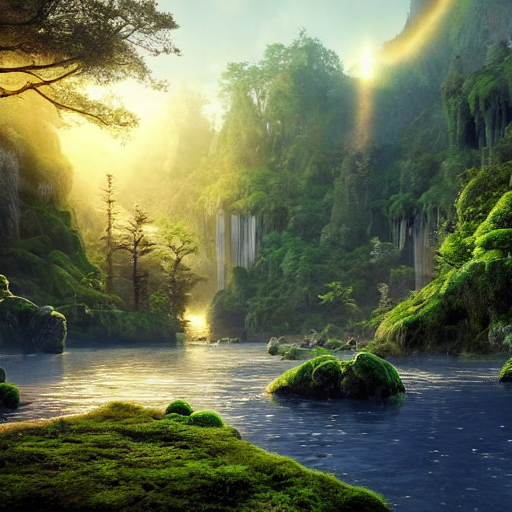

In [21]:
enhanced_image